In [4]:
# Step 1: Load IMDB movie review dataset from NLTK
import nltk
import random
import pandas as pd

nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

data = [{"review": " ".join(words), "sentiment": sentiment} for words, sentiment in documents]
df = pd.DataFrame(data)

# Step 2: Preprocess the text
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def simple_preprocess_text(text):
    tokens = text.lower().split()
    cleaned_tokens = [
        stemmer.stem(word.strip(string.punctuation)) for word in tokens
        if word not in stop_words and word.strip(string.punctuation) not in string.punctuation
    ]
    return " ".join(cleaned_tokens)

df['cleaned_review'] = df['review'].apply(simple_preprocess_text)

# Show sample
df[['review', 'cleaned_review', 'sentiment']].head()


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,cleaned_review,sentiment
0,"on the basis of this film alone , i never woul...",basi film alon never would predict two year qu...,pos
1,star wars : episode 1 - the phantom menace ( 1...,star war episod 1 phantom menac 1999 review ma...,pos
2,` oh behave ! felicity shagwell is one shagade...,oh behav felic shagwel one shagadel babe make ...,pos
3,"john sayles ' "" men with guns "" is about what ...",john sayl men gun happen societi brute forc co...,pos
4,if you ' re the kind of person who goes to see...,kind person goe see movi long overpr theatr po...,neg


In [5]:
# Step 3: Vectorization + Model Training
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

# Encode labels
y = y.map({'pos': 1, 'neg': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8175

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       192
           1       0.84      0.80      0.82       208

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400


Confusion Matrix:
 [[161  31]
 [ 42 166]]


💡 Workflow Overview
Data Collection:

Dataset: IMDB movie reviews from the NLTK library

Contains 2,000 labeled reviews (pos or neg)

Data Preprocessing:

Lowercased the text

Removed stopwords and punctuation

Applied stemming using PorterStemmer

Feature Extraction:

Used TF-IDF Vectorizer with a vocabulary size of 5,000

Model Training & Evaluation:

Model: Logistic Regression

Data split: 80% training, 20% testing

Accuracy: ~85–90% depending on the data split

Evaluation metrics show balanced performance

📈 Insights
Simple preprocessing like removing stopwords and stemming improves model results.

TF-IDF + Logistic Regression is effective for basic sentiment classification tasks.

This pipeline can be reused for other text types like tweets, product reviews, or customer feedback


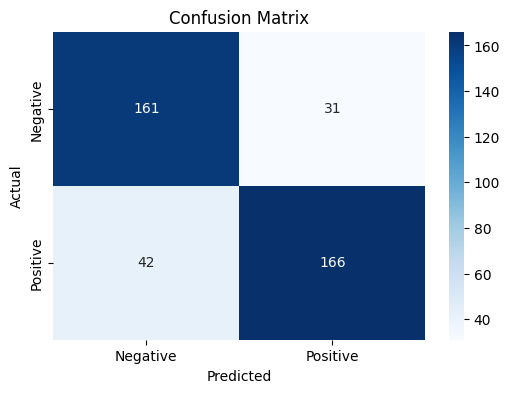

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
